# Tree Bark Image Classification

#### Aim: To develop an accurate tree bark image classifcation model capable of identifying and categorizing diverse tree species based on their bark patterns. 

## Importing Libraries

In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow import keras

## Load and analyze data set

In [5]:
data_dir=r"C:\Users\ATHIRA S\Downloads\tree bark"

In [6]:
data=keras.preprocessing.image_dataset_from_directory(data_dir,label_mode='categorical',image_size=(224,224))

Found 2020 files belonging to 14 classes.


In [7]:
class_names=data.class_names
num_classes=len(class_names)

In [8]:
class_count={class_name:0 for class_name in class_names}

In [9]:
for images,labels in data:
    for label in labels.numpy():
        class_name=class_names[label.argmax()]
        class_count[class_name]+=1
print('Number of Classes',num_classes)
print(' ')
print('Number of Samples belonging to each class:')
print(' ')
for class_name,count in class_count.items():
    print(f'{class_name}:{count} samples')
    print(' ')
    

Number of Classes 14
 
Number of Samples belonging to each class:
 
Adenium species:144 samples
 
Anacardium occidentale:239 samples
 
Artocarpus heterophyllus:138 samples
 
Carica papaya:207 samples
 
Chrysophyllum cainino:111 samples
 
Cocos nucifera:110 samples
 
Dipterocarpus alatus:158 samples
 
Eucalyptus:127 samples
 
Ficus microcarpa:150 samples
 
Ficus racemosa:117 samples
 
Musa:132 samples
 
Psidium guajava:122 samples
 
Terminalia catappa:113 samples
 
Veitchia merrilli:152 samples
 


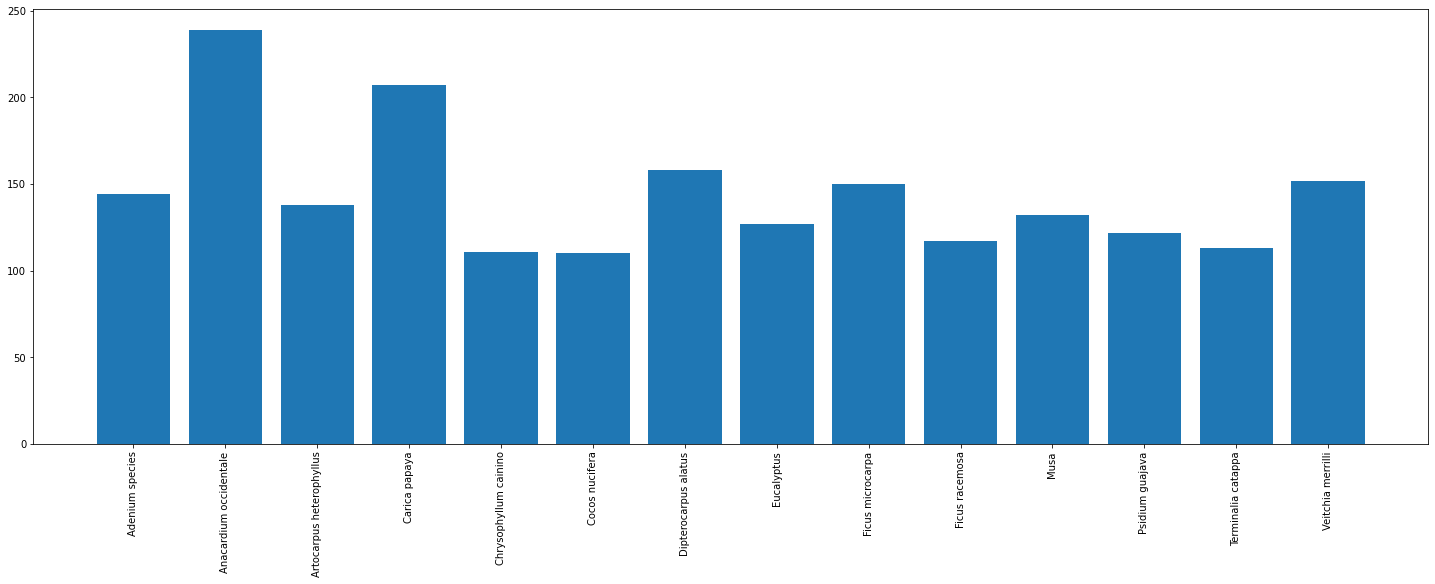

In [88]:
plt.figure(figsize=(25,8))
plt.bar(class_count.keys(),class_count.values())
plt.xticks(rotation=90)
plt.show()

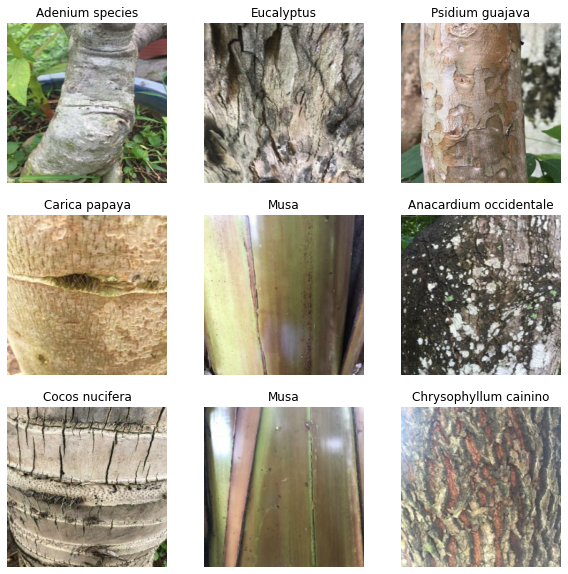

In [89]:
fig,axes=plt.subplots(3,3,figsize=(10,10))
for images,labels in data.take(1):
    for i in range(3):
        for j in range(3):
            image=images[i*3+j].numpy().astype('uint8')
            label=labels[i*3+j].numpy().argmax()
            class_name=class_names[label]
            axes[i,j].imshow(image)
            axes[i,j].set_title(class_name)
            axes[i,j].axis('off')
plt.show()

## Data Augmentation and Splitting Dataset

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    channel_shift_range=50.0,
    fill_mode='nearest',validation_split=0.1
)

In [11]:
val_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.1)


In [19]:
train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224,224),
    batch_size=20,
    class_mode='categorical',
    subset='training',
    )


Found 1824 images belonging to 14 classes.


In [20]:
val_data = val_datagen.flow_from_directory(
    data_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    subset='validation'
)

Found 196 images belonging to 14 classes.


## Loading Pre-trained VGG16 Model

In [98]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


58889256/58889256 [==============================] - 21s 0us/step


## Model Building

In [100]:
for layer in base_model.layers:
    layer.trainable = False


In [101]:
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

In [102]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [113]:
history=model.fit(
        train_data,
        epochs=20,
        validation_data=val_data,
    )

Epoch 1/20
92/92 [==============================] - 878s 10s/step - loss: 0.3642 - accuracy: 0.8717 - val_loss: 0.4687 - val_accuracy: 0.9592
Epoch 2/20
92/92 [==============================] - 850s 9s/step - loss: 0.3191 - accuracy: 0.8854 - val_loss: 0.3104 - val_accuracy: 0.9541
Epoch 3/20
92/92 [==============================] - 858s 9s/step - loss: 0.3520 - accuracy: 0.8750 - val_loss: 0.3033 - val_accuracy: 0.9439
Epoch 4/20
92/92 [==============================] - 873s 9s/step - loss: 0.3548 - accuracy: 0.8766 - val_loss: 0.2626 - val_accuracy: 0.9439
Epoch 5/20
92/92 [==============================] - 882s 10s/step - loss: 0.3327 - accuracy: 0.8794 - val_loss: 0.3417 - val_accuracy: 0.9337
Epoch 6/20
92/92 [==============================] - 879s 10s/step - loss: 0.3899 - accuracy: 0.8591 - val_loss: 0.3771 - val_accuracy: 0.9490
Epoch 7/20
92/92 [==============================] - 873s 9s/step - loss: 0.3342 - accuracy: 0.8734 - val_loss: 0.2772 - val_accuracy: 0.9490
Epoch 8/20

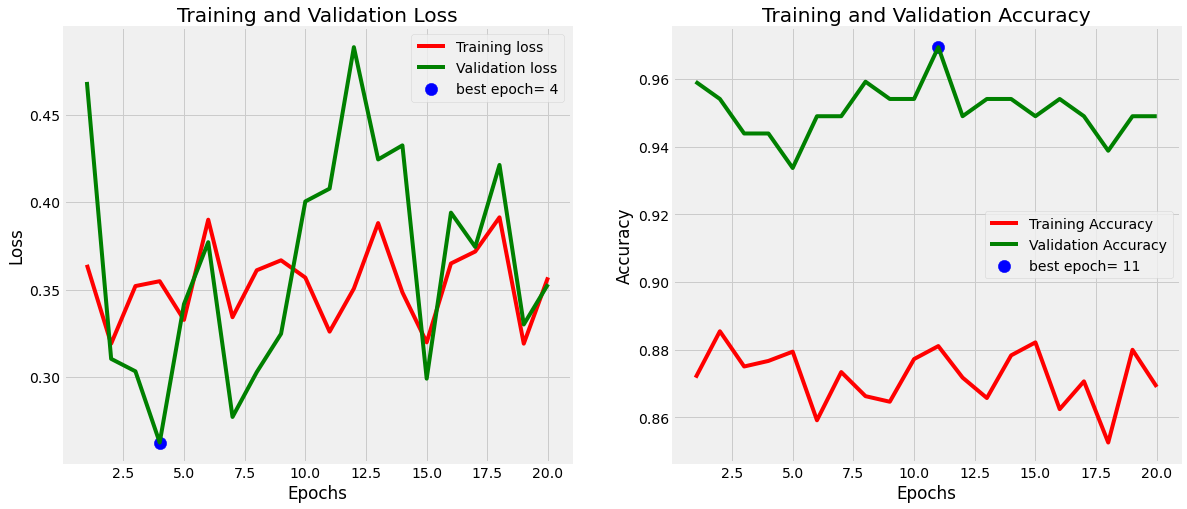

In [114]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()


In [115]:
model.save('my_tree_bark_model.h5')

## Stratified K-Fold Cross-Validation

In [103]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [108]:
for train_index, val_index in kf.split(train_data.filenames, train_data.classes):
    X_train, X_val = np.array(train_data.filenames)[train_index], np.array(train_data.filenames)[val_index]
    y_train, y_val = np.array(train_data.classes)[train_index], np.array(train_data.classes)[val_index]

    train_generator_fold = train_datagen.flow_from_directory(
        directory=data_dir, 
        target_size=(224, 224),
        batch_size=20,
        class_mode="categorical",
        subset='training',
        shuffle=True,
    )

    val_generator_fold = val_datagen.flow_from_directory(
        directory=data_dir,  
        target_size=(224, 224),
        batch_size=32,
        class_mode="categorical",
        subset='validation',
        shuffle=False,
    )

    
    model.fit(
        train_generator_fold,
        epochs=20,
        validation_data=val_generator_fold,
    )

    
    val_loss, val_accuracy = model.evaluate(val_generator_fold)
    print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Found 1824 images belonging to 14 classes.
Found 196 images belonging to 14 classes.
Epoch 1/20
92/92 [==============================] - 916s 10s/step - loss: 2.2063 - accuracy: 0.3810 - val_loss: 0.8464 - val_accuracy: 0.7857
Epoch 2/20
92/92 [==============================] - 871s 9s/step - loss: 1.2050 - accuracy: 0.5938 - val_loss: 0.4311 - val_accuracy: 0.9235
Epoch 3/20
92/92 [==============================] - 876s 10s/step - loss: 1.0148 - accuracy: 0.6513 - val_loss: 0.4453 - val_accuracy: 0.8827
Epoch 4/20
92/92 [==============================] - 886s 10s/step - loss: 0.8821 - accuracy: 0.6990 - val_loss: 0.2622 - val_accuracy: 0.9439
Epoch 5/20
92/92 [==============================] - 877s 10s/step - loss: 0.7760 - accuracy: 0.7303 - val_loss: 0.2322 - val_accuracy: 0.9439
Epoch 6/20
92/92 [==============================] - 874s 10s/step - loss: 0.7189 - accuracy: 0.7423 - val_loss: 0.2805 - val_accuracy: 0.9388
Epoch 7/20
92/92 [==============================] - 871s 9s/step

## Model Evaluation

In [12]:
model=tf.keras.models.load_model('my_tree_bark_model.h5')

In [21]:
predictions=model.predict(val_data)
decoded_predictions=np.argmax(predictions,axis=1)

7/7 [==============================] - 93s 11s/step


In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
true_labels = val_data.classes


accuracy = accuracy_score(true_labels, decoded_predictions)
print(f'Accuracy of the model is: {accuracy:.2f}')


Accuracy of the model is: 0.95


In [24]:
print(classification_report(true_labels,decoded_predictions))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        14
           1       1.00      1.00      1.00        23
           2       0.89      0.62      0.73        13
           3       1.00      1.00      1.00        20
           4       1.00      0.91      0.95        11
           5       1.00      1.00      1.00        11
           6       0.88      1.00      0.94        15
           7       1.00      0.92      0.96        12
           8       1.00      0.93      0.97        15
           9       0.79      1.00      0.88        11
          10       1.00      1.00      1.00        13
          11       1.00      0.92      0.96        12
          12       1.00      0.91      0.95        11
          13       1.00      1.00      1.00        15

    accuracy                           0.95       196
   macro avg       0.95      0.94      0.94       196
weighted avg       0.96      0.95      0.95       196



<AxesSubplot:>

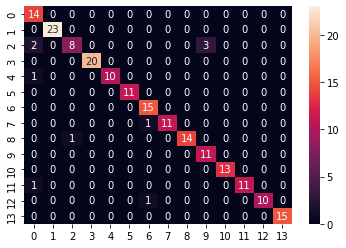

In [25]:
sns.heatmap(confusion_matrix(true_labels,decoded_predictions),annot=True)

1/1 [==============================] - 0s 424ms/step
This image most likely belongs to Cocos nucifera 


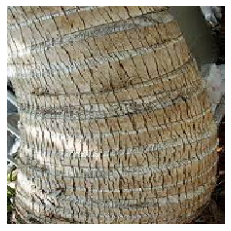

In [17]:
import matplotlib.pyplot as plt
img_path=r"C:\Users\ATHIRA S\Downloads\images (2).jpeg"
img = tf.keras.utils.load_img(
    img_path, target_size=(224,224,3)
)
plt.imshow(img)
plt.axis('off')
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} "
    .format(class_names[np.argmax(score)])
)

1/1 [==============================] - 0s 408ms/step
This image most likely belongs to Psidium guajava 


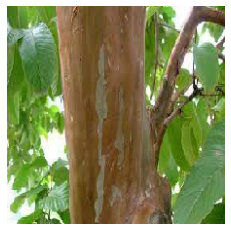

In [18]:
import matplotlib.pyplot as plt
img_path=r"C:\Users\ATHIRA S\Downloads\images (1).jpeg"
img = tf.keras.utils.load_img(
    img_path, target_size=(224,224,3)
)
plt.imshow(img)
plt.axis('off')
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} "
    .format(class_names[np.argmax(score)])
)